# 3.1. Linear regression basics

Linear regression is probably one of the most widely used algorithms in data science, and in many other applications. One of the best things about linear regression is that it allows us to use observations and measurements of things we know to make predictions about unknown things. These predictions might be about the likelihood of a person buying a product online, or the chance that someone will default on their loan payment. To start, we are going to use an even simpler example predicting the price of pizza based on its diameter. Your first task is to put the data into a DataFrame and make a scatter plot of the diameter versus the price.

In [1]:
#importing the appropriate packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = {'diameter' : [6, 8, 10, 14, 18], 'price' : [7, 9, 13, 17.5, 18]}
pizza = pd.DataFrame(data)
pizza

,diameter,price
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


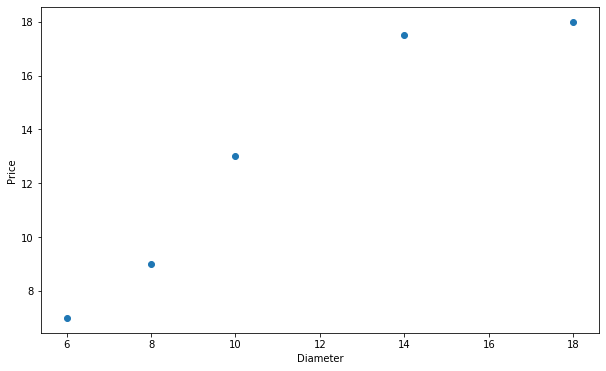

In [3]:
plt.figure(figsize = (10, 6))

plt.scatter(pizza.diameter, pizza.price)
plt.xlabel('Diameter')
plt.ylabel('Price')

plt.show()

If you were to draw a straight line through the points that came as close as possible to all of them, it would look like this:

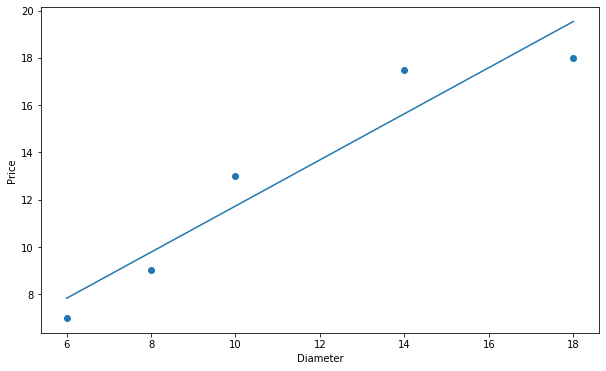

In [4]:
plt.figure(figsize = (10, 6))

plt.scatter(pizza.diameter, pizza.price)

m, b = np.polyfit(pizza.diameter, pizza.price, 1)
plt.plot(pizza.diameter, m * pizza.diameter + b)

plt.xlabel('Diameter')
plt.ylabel('Price')

plt.show()

What you can see pretty easily from this graph is that as the diameter of the pizza goes up, so does the price.

The line, called the trendline or the regression line is our best guess at a linear relationship that describes the data. This is important because we can come up with an equation for the line that will allow us to predict the y-value (price) for any given x-value (diameter). Linear regression is all about finding the best equation for that line.

There are actually several different ways we can come up with the equation for the line. We will look at two different solutions: One is a closed form equation that will work for any problem like this in just two dimensions. The second is a solution that will allow us to generalize the idea of a best fit line to many dimensions!

Recall the equation for a line that you learned in algebra: y=mx+b. What we need to do is determine the values for m and b. One way we can do that is simply guess, and keep refining our guesses until we get to a point where we are not really getting any better. You may think this sounds kind of stupid, but it is actually a pretty fundamental part of many machine learning algorithms.

In the world of machine learning, using the sample data for pizza along with a solver-like algorithm to find the values for the slope and intercept, is called supervised learning. That is because we are using the known values for the prices of different pizzas along with their diameters to help correct our algorithm and come up with a value for the slope and intercept. The values that the algorithm learns are called our model. This model is pretty simple, because it just uses two numbers and the formula for a line. But don’t let the simplicity fool you, regression is one of the most commonly used algorithms in a data scientist’s arsenal.

In the next section, we’ll make our own learning algorithm that uses more data to do a better job of making predictions!

# 3.2. A simple machine learning approach

Let’s develop some intuition by writing a function and trying to minimize the error, using the above pizza DataFrame. We'll use the following steps:

* Pick a random value for m and b.

* Compute the MSE for all our known points.

* Repeat the following steps 1000 times.

    * Make m slightly bigger and recompute the MSE. Does that make the MSE smaller? If so, use this new value for m. If not, make m slightly smaller and see if that helps.

    * Make b slightly bigger and recompute the MSE. Does that make the MSE smaller? If so, use this new value for b. If not, try a slightly smaller b and see if that makes the MSE smaller.

* After repeating the above enough times, we will be very close to the best possible values for m and b. We can now use these values to make predictions for other pizzas for which we know the diameter but don’t know the price.

You will write three functions:

* compute_y(x, m, b)

* compute_all_y(list_of_x) which should use compute_y

* compute_mse(list_of_known, list_of_predictions)

In [5]:
def compute_y(x, m, b):
    return m * x + b

In [6]:
def compute_all_y(list_of_x, m, b):
    list = []
    for i in range(len(list_of_x)):
        list = list + [compute_y(list_of_x[i], m, b)]
    return list

In [7]:
def compute_mse(list_of_known, list_of_predictions):
    mse = 0
    for i in range(len(list_of_known)):
        mse = mse + (list_of_known[i] - list_of_predictions[i]) ** 2
    return mse/len(list_of_known)

In [8]:
m = random.randint(0, 10)
b = random.randint(0, 10)

Next, write a function that systematically tries different values for m and b in order to minimize the MSE. Put this function in a for loop and iterate 1000 times. See what your values are for m and b at the end.

In [9]:
def pizza_mse(m, b, list):
    predictions = compute_all_y(list['diameter'], m, b)
    mse = compute_mse(list['price'], predictions)
    return(mse)

In [10]:
mse = pizza_mse(m, b, pizza)

for i in range(1000):
    if pizza_mse(m + 0.01, b, pizza) < mse:
        m = m + 0.01
    elif pizza_mse(m - 0.01, b, pizza) < mse:
        m = m - 0.01
    mse = pizza_mse(m, b, pizza)
        
    if pizza_mse(m, b + 0.01, pizza) < mse:
        b = b + 0.01
    elif pizza_mse(m, b - 0.01, pizza) < mse:
        b = b - 0.01
    mse = pizza_mse(m, b, pizza)

print(m, b)

1.0100000000000204 1.5900000000000012


Congratulations! You have just written your first machine learning algorithm. One fun thing you can do is to save the MSE at the end of each time through the loop, then plot it. You should see the error go down pretty quickly, then level off or go down very gradually. Note that the error will never go to 0 because the data isn’t perfectly linear. But nothing in the real world is!

0.9400000000000204 2.37000000000012


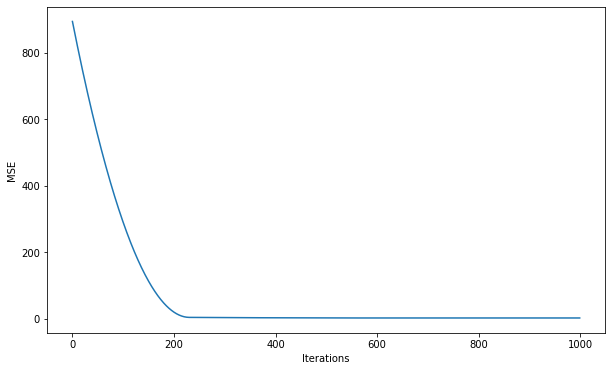

In [11]:
m = random.randint(0, 10)
b = random.randint(0, 10)

mse_per_iteration = []

mse = pizza_mse(m, b, pizza)

for i in range(1000):
    if pizza_mse(m + 0.01, b, pizza) < mse:
        m = m + 0.01
    elif pizza_mse(m - 0.01, b, pizza) < mse:
        m = m - 0.01
    mse = pizza_mse(m, b, pizza)
        
    if pizza_mse(m, b + 0.01, pizza) < mse:
        b = b + 0.01
    elif pizza_mse(m, b - 0.01, pizza) < mse:
        b = b - 0.01
    mse = pizza_mse(m, b, pizza)
    
    mse_per_iteration = mse_per_iteration + [mse]
    
print(m, b)

plt.figure(figsize = (10, 6))
plt.plot(mse_per_iteration)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

At this point your algorithm’s ability to learn is limited by how much you change the slope and intercept values each time through the loop. At the beginning, it’s good to change them by a lot but as you get closer to the best answer, it’s better to tweak them by smaller and smaller amounts. Can you adjust your code above to do this?

0.9960000000000009 1.7120000000000273


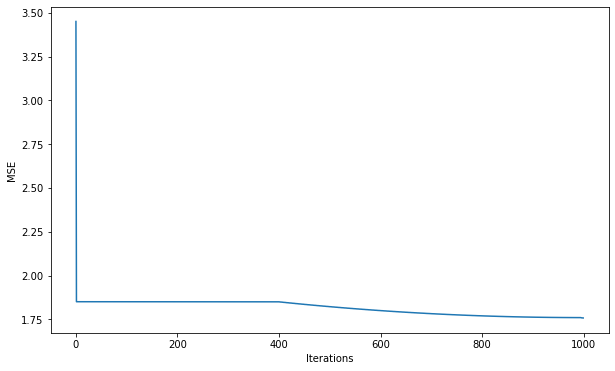

In [12]:
m = random.randint(0, 10)
b = random.randint(0, 10)

descending_list = np.arange(1, 0, -0.001)

mse_per_iteration = []

mse = pizza_mse(m, b, pizza)

for i in range(1000):
    if pizza_mse(m + descending_list[i], b, pizza) < mse:
        m = m + descending_list[i]
    elif pizza_mse(m - descending_list[i], b, pizza) < mse:
        m = m - descending_list[i]
    mse = pizza_mse(m, b, pizza)
        
    if pizza_mse(m, b + descending_list[i], pizza) < mse:
        b = b + descending_list[i]
    elif pizza_mse(m, b - descending_list[i], pizza) < mse:
        b = b - descending_list[i]
    mse = pizza_mse(m, b, pizza)
    
    mse_per_iteration = mse_per_iteration + [mse]
    
print(m, b)

plt.figure(figsize = (10, 6))
plt.plot(mse_per_iteration)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

# 3.3. Improving our pizza price predictions using scikit-learn

In the last section, we made a simple model that allows us to predict the price of pizza based on its size. However, we know that there are many other factors (we will call them features) that go into the price of a pizza. In this section, we will investigate how we can improve our model by adding a feature corresponding to the number of toppings. The theory here is that with more information we should be able to do a better job of making predictions.

Before we return to the bike rental problem, let’s see how we can duplicate our efforts on predicting Pizza prices in Python using Pandas and Scikit-Learn.

Scikit-Learn is a really powerful Python package for doing all kinds of machine learning tasks. It has a consistent API so once you have learned one kind of model with scikit-learn you will be able to apply that to many different machine learning algorithms. We will:

* create an empty model,
* fit that model to our data (some people also refer to this as training the model)
* and use that model to predict the values we want.

In [13]:
data = {'diameter' : [6, 8, 10, 14, 18], 'toppings':[2, 1, 0, 2, 2], 'price' : [7, 9, 13, 17.5, 18]}
pizza = pd.DataFrame(data)
pizza

,diameter,toppings,price
0,6,2,7.0
1,8,1,9.0
2,10,0,13.0
3,14,2,17.5
4,18,2,18.0


In [14]:
reg = LinearRegression()
reg.fit(pizza[['diameter','toppings']], pizza.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The fit method takes two parameters:

* The features that we use to build the model

* The known quantity that we are trying to fit the model against

Now, using the diameter and toppings we are able to make predictions about what the price will be.

In [15]:
reg.predict(pizza[['diameter','toppings']])

array([ 7.25903614,  9.90361446, 12.54819277, 15.36746988, 19.42168675])

We can also use the mean_squared_error function supplied by sklearn to check the mean squared error of our predictions. This function takes two parameters: The “true” values, in our case, the known price, and the predicted values.

In [16]:
mean_squared_error(pizza.price, reg.predict(pizza[['diameter', 'toppings']]))

1.5313253012048187

We can also add the predictions to our dataframe so that we can graph the actual values and predicted values together.

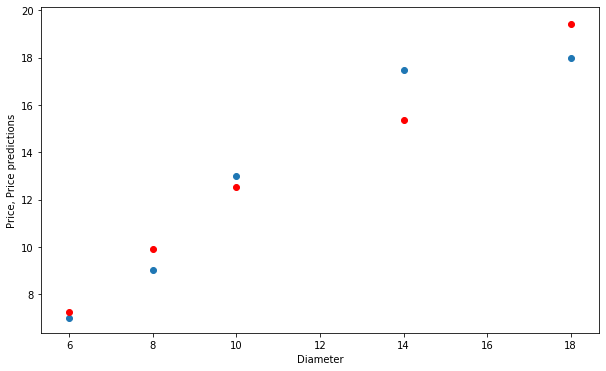

In [17]:
pizza['predictions'] = reg.predict(pizza[['diameter', 'toppings']])

plt.figure(figsize = (10, 6))

plt.scatter(pizza.diameter, pizza.price)
plt.scatter(pizza.diameter, pizza.predictions, color = 'red')

plt.xlabel('Diameter')
plt.ylabel('Price, Price predictions')

plt.show()

## 3.3.1. Practice

Build another model using only the diameter, plot the predictions from that model along with the actual values and compare that to the previous diagram. Hint: sklearn expects to have the data it uses to build the model in a certain format. By default a single series gets converted into an array that looks like this:

In [18]:
pizza.diameter.values

array([ 6,  8, 10, 14, 18], dtype=int64)

But sklearn wants it to look as below. The error message you will likely get in this instance tells you how to reshape the data. You can use pizza.diameter.values.reshape(-1,1) to get the diameter into the correct shape.

In [19]:
pizza.diameter.values.reshape(-1,1)

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

In [20]:
reg = LinearRegression()
reg.fit(pizza[['diameter']], pizza.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
predictions = reg.predict(pizza[['diameter']])

In [22]:
mean_squared_error(pizza.price, predictions)

1.7495689655172406

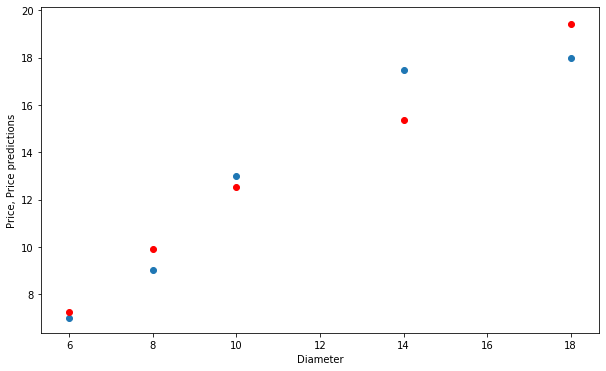

In [23]:
plt.figure(figsize = (10, 6))

plt.scatter(pizza.diameter, pizza.price)
plt.scatter(pizza.diameter, pizza.predictions, color = 'red')

plt.xlabel('Diameter')
plt.ylabel('Price, Price predictions')

plt.show()

Build a third model using only the number of toppings. What is the mean squared error of this model?

In [24]:
reg = LinearRegression()
reg.fit(pizza[['toppings']], pizza.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
predictions = reg.predict(pizza[['toppings']])

In [26]:
mean_squared_error(pizza.price, predictions)

18.584374999999998